# EA 614 Análise de Sinais
## Exercício de Fixação de Conceitos (EFC) 5 – Transformada Discreta de Fourier
### Júlia Perassolli De Lázari
### RA: 200298

## Introdução
A transformada discreta de Fourier (DFT) é a ferramenta matemática utilizada
para obter a representação no domínio da frequência de um sinal discreto x[n] de comprimento finito. 

Na realidade, a DFT de N pontos fornece amostras da transformada de Fourier X(e<sup>j$\Omega$</sup>) nas frequências $\Omega$<sub>k</sub> = $\frac{2 \pi k}{N}$, podendo ser armazenada na forma de um vetor, assim como o próprio sinal x[n]. Neste exercício, estudaremos alguns aspectos ligados ao uso da DFT para analisar o espectro de sinais.

## Percebendo o Vazamento de Frequências

Considere o sinal x(t) = sen(2$\pi$f<sub>0</sub>t), com f<sub>0</sub> = 3 Hz. Sabemos que o espectro deste sinal, denotado por X(j$\omega$),
possui somente componentes situadas nas frequências $\omega$<sub>0</sub> = ±2$\pi$f<sub>0</sub> rad/s. Gostaríamos, então, de poder observar seu comportamento em frequência empregando um computador digital.

In [ ]:
#@title Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal

### Item a

Gere a sequência x[n] tomando N = 64 amostras de x(t) no intervalo de 0 a 1 segundo (ou seja, a frequência de amostragem é igual a f<sub>s</sub> = 64 Hz). Logo, x[n] = sen(2$\pi \frac{f0}{fs}$n), onde n = 0,..., N − 1.


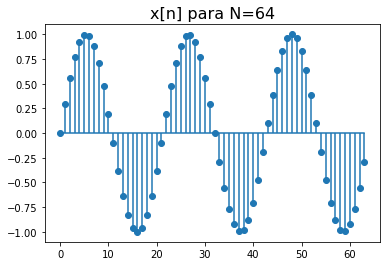

In [ ]:
#frequencies
f0 = 3 #fundamental frequency
fs = 64 #sample frequency

#number of samples
N=64

#define xn as a vector
xn = []
for n in range(N): #as N=64
  xn.append(math.sin(2*math.pi*(f0/fs)*n))

#plt
plt.title("x[n] para N=64, f0 = 3 Hz", fontsize = 16)
plt.stem(xn,use_line_collection=True,basefmt='C0')
plt.show()

A partir do gráfico é possível observar que a sequência x[n] é formada por amostras de x(t) (senoide) igualmente espaçadas, assim como descrito no enunciado.

### Item b

Calcule a transformada de Fourier X(e<sup>j$\Omega$</sup>) associada à sequência x[n]. Mostre todos os passos da derivação.

**Dica:** Note que a sequência x[n] é uma versão truncada (ou janelada) da senoide discreta. Ou seja, x[n] =  sen(2$\pi \frac{f_0}{f_s}$n)w<sub>N</sub>[n], onde w<sub>N</sub>[n] é uma janela retangular de comprimento N, de modo que:

$$wN [n] =
\begin{cases}
    1,& \text{se } 0 ≤ n ≤ N − 1\\
    0,              & \text{cc}
\end{cases}$$


Fazendo $\omega$<sub>0</sub> = 2$\pi$f<sub>0</sub> rad/s, podemos reescrever a expressão para x[n] como um produto entre $x_1[n]$ e $x_2[n]$, sendo:
 
$x_1[n]$ =  $sen(\frac{\omega_0}{f_s}n)$ = $\frac{e^{j\frac{w_0}{f_s}n} -  e^{-j\frac{w_0}{f_s}n}}{2j}$

e $x_2[n]$ = w<sub>N</sub>[n] = u[n] - u[n-N]

Temos que a transformadas de Fourier são para o seno ($X_1(e^{j\Omega}$) e para a janela ($X_2(e^{j\Omega}$) são dadas por:

$X_1(e^{j\Omega}) = \frac{1}{2j}[F(e^{j\frac{w_0}{f_s}n})-F(e^{-j\frac{w_0}{f_s}n})] = \frac{\pi}{j}[\delta(\Omega - \frac{\omega_0}{f_s}) - \delta(\Omega + \frac{\omega_0}{f_s})]$

$X_2(e^{j\Omega}) = \sum_{n=0}^{N-1} e^{-j\Omega n} = \frac{1- e^{-j\Omega (N-1)} - e^{-j\Omega}}{1 - e^{-j\Omega}}$

A multiplicação no tempo entre x[n] e w<sub>N</sub>[n] será uma convolução no domínio da frequência:

$X(e^{j\Omega}) = \frac{1}{2 \pi}(X_1(e^{j\Omega})*X_2(e^{j\Omega})$

$X(e^{j\Omega}) = \frac{1}{2 \pi}\big[\frac{j}{\pi} (e^{-j( \Omega - \frac{w_0}{f_s})(\frac{N-1}{2})} \frac{sin (\Omega - w_0/f_0)N/2)}{sin (\Omega - w_0/f_0)} - e^{j( \Omega + \frac{w_0}{f_s})(\frac{N-1}{2})} \frac{sin (\Omega + w_0/f_0)N/2)}{sin (\Omega + w_0/f_0)})\big]$

$X(e^{j\Omega}) = \frac{j}{2}\big[e^{j( \Omega + \frac{w_0}{f_s})(\frac{N-1}{2})} \frac{sin (\Omega + w_0/f_0)N/2)}{sin (\Omega + w_0/f_0)} - e^{-j( \Omega - \frac{w_0}{f_s})(\frac{N-1}{2})} \frac{sin (\Omega - w_0/f_0)N/2)}{sin (\Omega - w_0/f_0)}\big]$






### Item c

Utilizando o comando np.fft.fft(), compute a DFT da sequência x[n] com N pontos. Apresente, então, o gráfico de $|X(k)|$ em função da frequência $\Omega$. Na mesma figura, plote $|X$(e<sup>j$\Omega$</sup>)$|$.

Você pode obter $|X$(e<sup>j$\Omega$</sup>)$|$ trabalhando com o comando scipy.signal.freqz(). 

Tendo em vista as propriedades da DFT, analise o espectro obtido, relacionando-o
com $|X$(e<sup>j$\Omega$</sup>)$|$ e com $X($j$\omega$$)$ (i.e., com o espectro da senoide analógica).

Obs.: Como os sinais em questão são reais, podemos analisar apenas a faixa de frequências de 0 a π por conta da simetria par do módulo da resposta em frequência.

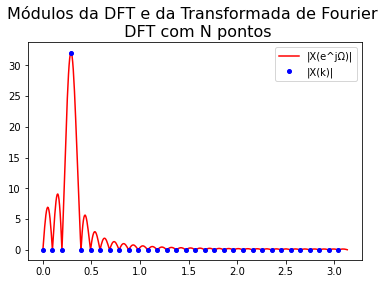

In [ ]:
#define N_2 as N/2 
N_2 = int(N/2)

#compute omega
omega = []
for k in range (N_2): #N/2
  omega.append(2*math.pi*k/N)

#compute value of xn using the dft function from numpy
dft_n = np.abs(np.fft.fft(xn))
#get values only for the range 0 to pi (first half of the vector)
dft_n = dft_n[0:N_2]

#calculate Xe^jomega using the signal.freqz from scipy
w,xe_jΩ = signal.freqz(xn)
xe_jΩ = np.abs(xe_jΩ)

#plot
plt.title("Módulos da DFT e da Transformada de Fourier \n DFT com N pontos", fontsize = 16)
plt.plot(w,xe_jΩ,color='r',label = '|X(e^jΩ)|')
plt.plot(omega,dft_n,marker = '.',linestyle ='',markersize = 8,color='b',label = '|X(k)|')
plt.legend()
plt.show()

Em azul observamos os valores da Transformada Discreta de Fourier (DFT), que são iguais a 0 exceto por um valor de pico. Em vermelho observamos o espectro em frequência do módulo da Transformada de Fourier da sequência e pode-se perceber que é formado por senoides de diferentes amplitudes.

Tal comportamento pode ser justificado ao analisar a equação encontrada no item b) pois como $f_0$ e $k$ são valores inteiros temos que, no momento da amostragem, teremos senos de múltiplos de $\pi$, sendo esses iguais a 0. O valor de pico ocorre quando $\Omega$ se iguala ao valor de $\omega_0$.

Ao comparar $|X(k)|$ com $X(j\omega)$, transformada da senoide analógica, percebemos uma grande semelhança, uma vez que  $|X(k)|$ contém apenas um impulso na frequência fundamental. Já $|X$(e<sup>j$\Omega$</sup>)$|$, apresenta diferenças no espectro, por se tratar da transformada de uma sequência discreta e limitada no tempo, x[n].



## Item d

Repita o item (c), mas agora calcule a DFT utilizando 2N pontos. O espectro obtido continua sendo uma representação compatível com o esperado para uma senoide pura? Explique o que ocorreu.

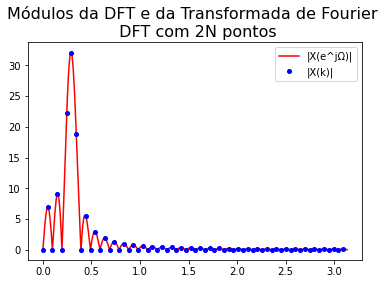

In [ ]:
#compute omega
omega2 = []
for k in range (N): 
  omega2.append(2*math.pi*k/(2*N))

#compute value of xn using the dft function from numpy
dft_2n = np.abs(np.fft.fft(xn, n=int(2*N))) #dft with 2N points
#get values only for the range 0 to pi (first half of the vector)
dft_2n = dft_2n[0:N]

#plot
plt.title("Módulos da DFT e da Transformada de Fourier \n DFT com 2N pontos", fontsize = 16)
plt.plot(w,xe_jΩ,color='r',label = '|X(e^jΩ)|')
plt.plot(omega2,dft_2n,marker = '.',linestyle ='',markersize = 8,color='b',label = '|X(k)|')
plt.legend()
plt.show()

Em vermelho observamos o espectro em frequência do módulo da Transformada de Fourier, igual ao do item azul. Em azul observamos a DFT de 2N pontos. Percebe-se que há mais pontos e que eles estão mais próximos, o que ocorre pois dobramos a frequência de amostragem ao realizar a DFT com 2N pontos. Há também mais pontos diferentes de zero pelo mesmo motivo.

Podemos observar que, nesse caso, $|X(k)|$ se aproxima mais de $|X$(e<sup>j$\Omega$</sup>)$|$, transformada da sequência discreta do que de  $X(j\omega)$, transformada da senoide analógica.

Vale ressaltar que para cálculo da DFT com 2N pontos, zeros são adicionados à sequência.

## Item e

Repita os itens (a) e (c) considerando que a frequência fundamental da senoide analógica é f0 = 3,4Hz.

O espectro obtido continua sendo uma representação compatível com o esperado para uma senoide pura?

Comente.

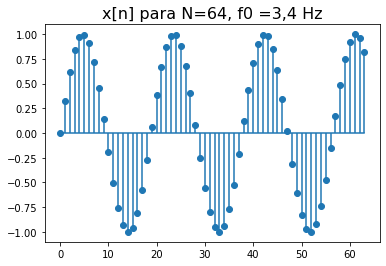

In [ ]:
#frequencies
f0 = 3.4 #fundamental frequency
fs = 64 #sample frequency

#number of samples
N = 64

#define xn as a vector
xn = []
for n in range(N): #as N=64
  xn.append(math.sin(2*math.pi*(f0/fs)*n))

#plt
plt.title("x[n] para N=64, f0 =3,4 Hz", fontsize = 16)
plt.stem(xn,use_line_collection=True,basefmt='C0')
plt.show()


No item a) a senoide tinha 3 períodos inteiros, agora temos 3 períodos e o início de um quarto. Isso ocorre pois a frequência fundamental é maior.

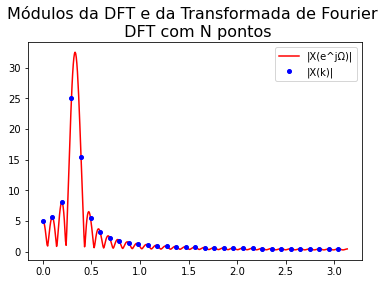

In [ ]:
#define N_2 as N/2 
N_2 = int(N/2)

#compute omega
omega = []
for k in range (N_2): #N/2
  omega.append(2*math.pi*k/N)

#compute value of xn using the dft function from numpy
dft_n = np.abs(np.fft.fft(xn))
#get values only for the range 0 to pi (first half of the vector)
dft_n = dft_n[0:N_2]

#calculate Xe^jomega using the signal.freqz from scipy
w,xe_jΩ = signal.freqz(xn)
xe_jΩ = np.abs(xe_jΩ)

#plot
plt.title("Módulos da DFT e da Transformada de Fourier \n DFT com N pontos", fontsize = 16)
plt.plot(w,xe_jΩ,color='r',label = '|X(e^jΩ)|')
plt.plot(omega,dft_n,marker = '.',linestyle ='',markersize = 8,color='b',label = '|X(k)|')
plt.legend()
plt.show()

Observamos que nesse caso, os pontos da DFT não estão mais nos zero. Isso ocorre pois a frequência fundamental $f_0$ e a frequência de amostragem não são compotíveis, ou seja, não teremos senos de múltiplos de $\pi$, o que fazia com que os valores da DFT fossem zerados. Além disso não há nenhum ponto da DFT no pico da maior senoide, pois nenhum valor de k faz com que a amostra seja tomada na frequência fundamental. O cenário descrito caracteriza um erro conhecido como vazamento de frequências.

Conclui-se que nesse caso,  $|X(k)|$ se aproxima mais de $|X$(e<sup>j$\Omega$</sup>)$|$, transformada da sequência discreta do que de  $X(j\omega)$, transformada da senoide analógica.



## Conclusão

Com esse exercício foi possível entender melhor o uso da DFT (Transformada Discreta de Fourier) para processamento de sinais e também o fenômeno de vazamento de frequências (spectral leakage). 

Como muitas vezes não conhecemos a frequência fundamental do nosso sinal, esse fenômeno é comum e o uso de janelas para atenuar esse efeito. O efeito desejado ao utilizar janelas é obter valores nulos em frequências diferentes da de interesse, extraindo apenas os valores na frequência de interesse.
